In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(random_state=42)

In [2]:
X,y=make_classification(n_samples=10000,
                    n_features=20, 
                    n_informative=2,
                    n_redundant=2,
                    n_repeated=0,
                    n_classes=2,
                    random_state=42)

In [3]:
X.shape

(10000, 20)

In [4]:
X[:2]

array([[-0.6531912 , -0.81238767,  1.19535267, -2.10168682,  0.1341503 ,
         1.55095273, -1.37272924,  0.61196627,  0.88262685,  0.75505386,
        -1.0716045 , -0.04271342,  0.75066317,  1.19834816,  2.34352695,
         1.35734475,  0.57872361,  1.60033929,  0.77295496, -0.29007468],
       [ 0.6776613 ,  1.05645354, -1.00719561,  0.61448152,  0.7910974 ,
         3.25976687, -0.50279976, -1.26113193, -0.61779136, -0.16256229,
         0.95588989, -1.14484807,  2.57379775, -0.21527978,  1.18267803,
         0.3178878 , -0.13068058,  0.55370642,  0.72971507,  0.68225029]])

In [5]:
y[:2]

array([1, 1])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model= LogisticRegression()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1006
           1       0.89      0.90      0.89       994

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



### train using XGBClassifier

In [7]:
from xgboost import XGBClassifier
model= XGBClassifier()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1006
           1       0.91      0.95      0.93       994

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [8]:
probability= model.predict_proba(X_test)[:,1]
y_pred=(probability>0.86662495).astype(int)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1006
           1       0.94      0.90      0.92       994

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [9]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,probability)
fpr[:5],tpr[:5],thresholds[:5]

(array([0., 0., 0., 0., 0.]),
 array([0.        , 0.00100604, 0.00905433, 0.0110664 , 0.16297787]),
 array([       inf, 0.99995947, 0.9999175 , 0.9999039 , 0.9992211 ],
       dtype=float32))

In [10]:
tpr

array([0.        , 0.00100604, 0.00905433, 0.0110664 , 0.16297787,
       0.16297787, 0.20321932, 0.20523139, 0.21730382, 0.21730382,
       0.26961771, 0.26961771, 0.30985915, 0.30985915, 0.32193159,
       0.32394366, 0.33400402, 0.33400402, 0.48189135, 0.48189135,
       0.49195171, 0.49195171, 0.49597586, 0.49597586, 0.50201207,
       0.50201207, 0.52112676, 0.52112676, 0.52313883, 0.52313883,
       0.53219316, 0.53219316, 0.53420523, 0.53420523, 0.55432596,
       0.55432596, 0.56136821, 0.56136821, 0.56438632, 0.56438632,
       0.56539235, 0.56539235, 0.57042254, 0.57042254, 0.61167002,
       0.61167002, 0.61267606, 0.61267606, 0.64285714, 0.64285714,
       0.65291751, 0.65291751, 0.66700201, 0.66700201, 0.67605634,
       0.67605634, 0.68410463, 0.68410463, 0.69014085, 0.69014085,
       0.69919517, 0.69919517, 0.7082495 , 0.7082495 , 0.71026157,
       0.71026157, 0.7193159 , 0.7193159 , 0.7444668 , 0.7444668 ,
       0.74748491, 0.74748491, 0.76056338, 0.76056338, 0.76861

In [11]:
import numpy as np
desired_recall=0.9
closest_recall=np.argmin(abs(tpr-desired_recall))
closest_recall

np.int64(120)

In [12]:
thresholds[closest_recall],fpr[closest_recall]

(np.float32(0.86662495), np.float64(0.061630218687872766))

In [13]:
from sklearn.metrics import auc
area=auc(fpr,tpr)
area

np.float64(0.9720509938357782)

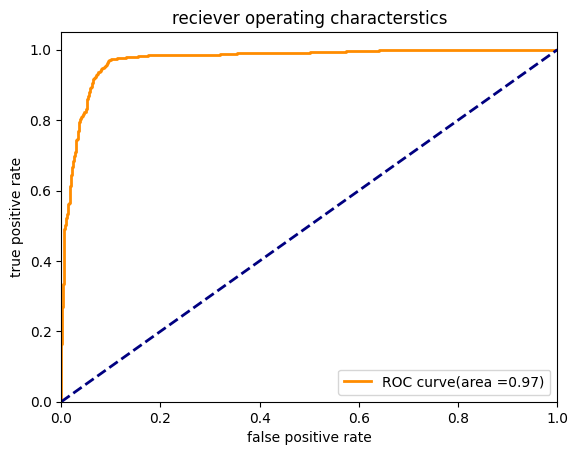

In [14]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',lw=2,label='ROC curve(area =%0.2f)'%area)
plt.plot([0,1],[0,1],color= 'navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('reciever operating characterstics')
plt.legend(loc='lower right')
plt.show()

In [15]:
### XGBoost

In [16]:
from xgboost import XGBClassifier
model= XGBClassifier()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1006
           1       0.91      0.95      0.93       994

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [17]:
probability= model.predict_proba(X_test)[:,1]
fpr_xgb,tpr_xgb,thresholds_xgb=roc_curve(y_test,probability)

area_2= auc(fpr_xgb,tpr_xgb)
area_2

np.float64(0.9720509938357782)

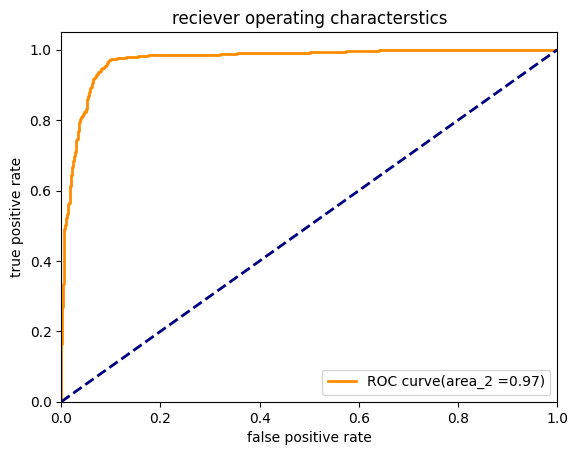

In [18]:
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color = 'darkorange',lw=2,label='ROC curve(area_2 =%0.2f)'%area_2)
plt.plot([0,1],[0,1],color= 'navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('reciever operating characterstics')
plt.legend(loc='lower right')
plt.show()

### KFolds

In [19]:
from sklearn.model_selection import KFold
kf= KFold(n_splits=5,shuffle=True,random_state=42)
for train_index,test_index in kf.split(X,y):
    scores = []
    model= LogisticRegression()
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]

    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))

0.8945
0.8845
0.8735
0.89
0.899


### Evaluate using logistic_regression

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores=cross_val_score(LogisticRegression(),X,y,cv=kf)
np.average(scores)

np.float64(0.8882999999999999)

### Evaluate using Decision_tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
scores2=cross_val_score(DecisionTreeClassifier(),X,y,cv=kf)
np.average(scores2)

np.float64(0.8901)

### Evaluate using Random_forest_classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
scores3=cross_val_score(RandomForestClassifier(n_estimators=20),X,y,cv=kf,scoring=('roc_auc'))
np.average(scores3)

np.float64(0.9665600106902918)

In [23]:
from sklearn.model_selection import cross_validate
cross_validate(DecisionTreeClassifier(),X,y,cv=kf)

{'fit_time': array([0.76193094, 0.8440733 , 0.90179896, 0.90384722, 1.01427889]),
 'score_time': array([0.00299311, 0.00313139, 0.00588775, 0.00199556, 0.00299621]),
 'test_score': array([0.8915, 0.879 , 0.8835, 0.8955, 0.8955])}

### hyperparameter tuning: GridSearchCV

### method:1,evaluate the model using train_test_split and tune the parameter by trail and error

In [24]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(criterion="gini",max_depth=10)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1006
           1       0.91      0.94      0.93       994

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



### cross_val_scores

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(criterion="gini",max_depth=5),X,y,cv=5)

array([0.929 , 0.9295, 0.9145, 0.9395, 0.9335])

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(criterion="gini",max_depth=10),X,y,cv=5)

array([0.9205, 0.92  , 0.914 , 0.9335, 0.9295])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(criterion="gini",max_depth=15),X,y,cv=5)

array([0.911 , 0.9065, 0.8975, 0.9125, 0.9105])

In [28]:
criterion=['gini','entropy']
max_depth=[5,10,15]

avg_scores={}

for c in criterion:
    for d in max_depth:
        clf=DecisionTreeClassifier(criterion=c,max_depth=d)
        score=cross_val_score(clf,X,y,cv=5)
        avg_scores[c+'_'+str(d)]=np.average(score)
avg_scores        

{'gini_5': np.float64(0.9291),
 'gini_10': np.float64(0.9212),
 'gini_15': np.float64(0.9077999999999999),
 'entropy_5': np.float64(0.9269999999999999),
 'entropy_10': np.float64(0.9234),
 'entropy_15': np.float64(0.9042)}

In [29]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(
    DecisionTreeClassifier(),
    {
    'criterion':["gini","entropy"],
    'max_depth':[5,10,15]
   },
   cv=5,
   return_train_score=False
)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.33345327, 0.58788362, 0.73647041, 0.49581761, 0.87472887,
        1.00567875]),
 'std_fit_time': array([0.01678645, 0.01367811, 0.02925837, 0.02107779, 0.07940341,
        0.07647326]),
 'mean_score_time': array([0.0026895 , 0.0029511 , 0.0029851 , 0.00324988, 0.00306621,
        0.00225496]),
 'std_score_time': array([5.75434956e-04, 3.05373098e-04, 4.55669241e-05, 1.04657928e-03,
        6.48400892e-04, 4.31562997e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_max_depth': masked_array(data=[5, 10, 15, 5, 10, 15],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'criterion': 'gini', 'max_depth': 5},
  {'criterion': 'gini', 'max_depth': 10},
  {'criterion': 'gini', 'max_depth': 15},
  {'criterion': '

In [30]:
import pandas as pd
df= pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.333453,0.016786,0.002690,0.000575,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.9285,0.9290,0.9145,0.9395,0.9330,0.9289,0.008206,1
1,0.587884,0.013678,0.002951,0.000305,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.9215,0.9190,0.9135,0.9275,0.9275,0.9218,0.005325,4
2,0.736470,0.029258,0.002985,0.000046,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.9030,0.9100,0.8960,0.9150,0.9015,0.9051,0.006666,5
3,0.495818,0.021078,0.003250,0.001047,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.9270,0.9285,0.9170,0.9305,0.9310,0.9268,0.005105,2
4,0.874729,0.079403,0.003066,0.000648,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.9160,0.9240,0.9115,0.9300,0.9315,0.9226,0.007781,3
5,1.005679,0.076473,0.002255,0.000432,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.9040,0.9020,0.8970,0.9090,0.9130,0.9050,0.005550,6


In [31]:
df[['param_criterion','param_max_depth','mean_test_score']]

,param_criterion,param_max_depth,mean_test_score
0,gini,5,0.9289
1,gini,10,0.9218
2,gini,15,0.9051
3,entropy,5,0.9268
4,entropy,10,0.9226
5,entropy,15,0.9050


In [32]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [33]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [34]:
from sklearn import svm

model_params={
    'descision_tree':{
    'model':DecisionTreeClassifier(),
    'params':{
        'criterion':["gini","entropy"],
    'max_depth':[5,10,15]
    }
    },
    'svm':{
         'model':svm.SVC(gamma='auto'),
           'params':{
           'C':[1,10,20],
           'kernel':['rbf','linear']
    }
 }
}
scores=[]
for key,val in model_params.items():
   clf= GridSearchCV(val['model'],val['params'],cv=5,return_train_score=False)
   clf.fit(X,y)
   scores.append({
            'model':key,
            'best_score':clf.best_score_,
            'best_params':clf.best_params_    
   })
scores


[{'model': 'descision_tree',
  'best_score': np.float64(0.9291),
  'best_params': {'criterion': 'gini', 'max_depth': 5}},
 {'model': 'svm',
  'best_score': np.float64(0.9242000000000001),
  'best_params': {'C': 1, 'kernel': 'rbf'}}]

In [35]:
pd.DataFrame(scores)

,model,best_score,best_params
0,descision_tree,0.9291,"{'criterion': 'gini', 'max_depth': 5}"
1,svm,0.9242,"{'C': 1, 'kernel': 'rbf'}"


### Randomized_searchcv

In [36]:
from sklearn.model_selection import RandomizedSearchCV
clf=RandomizedSearchCV(
    DecisionTreeClassifier(),
    {
    'criterion':["gini","entropy"],
    'max_depth':[5,10,15]
   },
   cv=5,
   return_train_score=False,
   n_iter=3
)
clf.fit(X,y)
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.516662,0.106116,0.000569,0.000746,10,gini,"{'max_depth': 10, 'criterion': 'gini'}",0.9200,0.9230,0.9110,0.9330,0.9285,0.9231,0.007526,1
1,0.607893,0.017749,0.000604,0.000802,15,gini,"{'max_depth': 15, 'criterion': 'gini'}",0.9075,0.9070,0.8950,0.9125,0.9095,0.9063,0.005972,3
2,0.643935,0.028160,0.004602,0.002782,10,entropy,"{'max_depth': 10, 'criterion': 'entropy'}",0.9180,0.9245,0.9125,0.9280,0.9310,0.9228,0.006728,2


In [37]:
clf.best_params_

{'max_depth': 10, 'criterion': 'gini'}